In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline

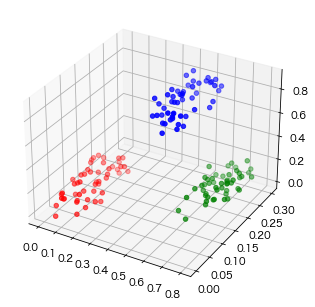

In [2]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [3]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data)

CPU times: user 11.4 s, sys: 127 ms, total: 11.5 s
Wall time: 1.87 s


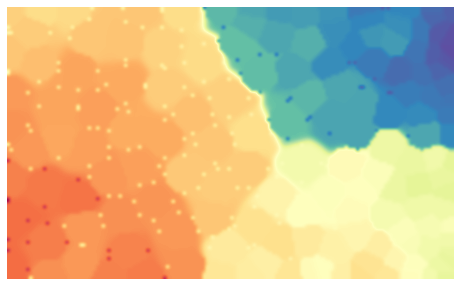

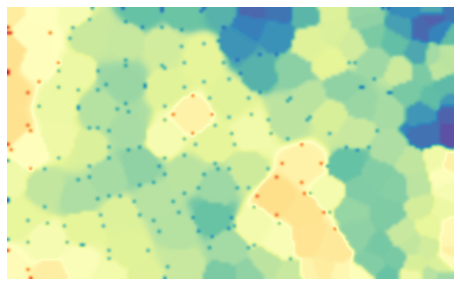

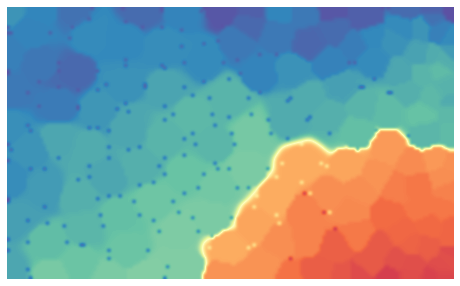

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [4]:
som.view_component_planes()

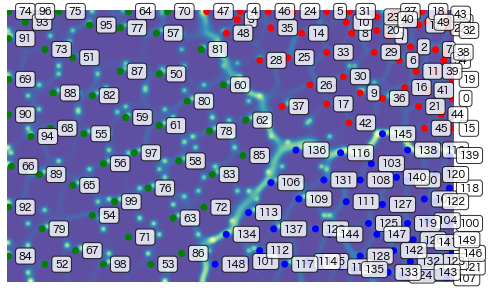

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [5]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

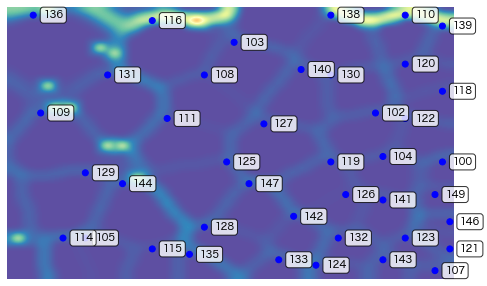

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [6]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels,
                 zoom=((50, n_rows), (100, n_columns)))

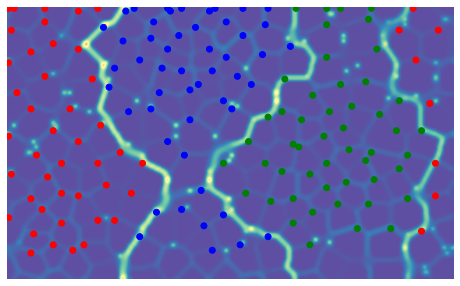

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [7]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False)
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

/opt/anaconda3/lib/python3.8/site-packages/somoclu/train.py:702: MatplotlibDeprecationWarning: 
The 'offset_position' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'offset_position', they should be passed as keyword, not positionally.
  collection = mcoll.PolyCollection(
/opt/anaconda3/lib/python3.8/site-packages/somoclu/train.py:702: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  collection = mcoll.PolyCollection(
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: Support for offset_position='data' is deprecated since 3.3 and will be removed two minor releases later.
  fig.canvas.print_figure(bytes_io, **kw)


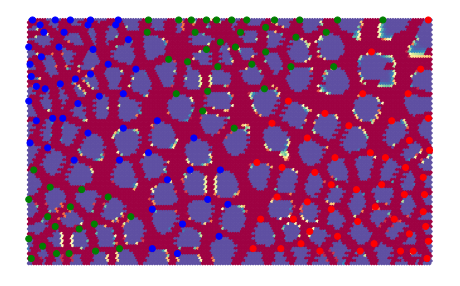

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [8]:
som = somoclu.Somoclu(n_columns, n_rows, gridtype="hexagonal",
                      compactsupport=False)
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

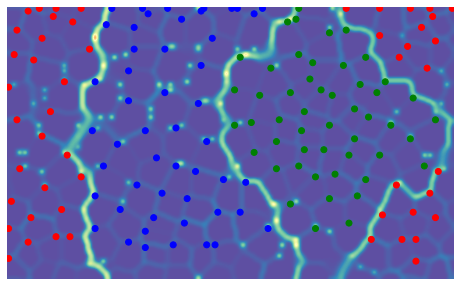

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [9]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False, initialization="pca")
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

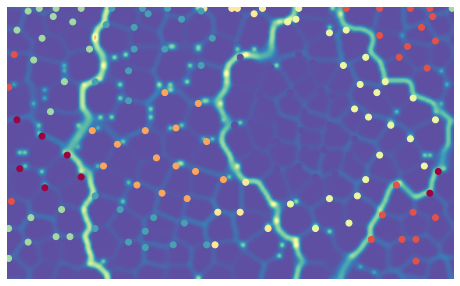

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [10]:
som.cluster()
som.view_umatrix(bestmatches=True)

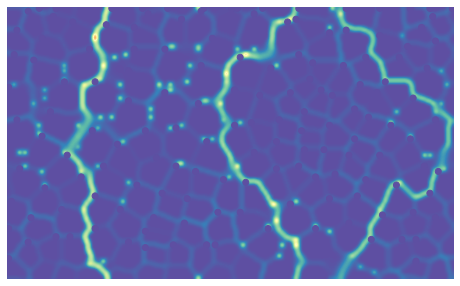

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [11]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

In [12]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid")
som.train(data)

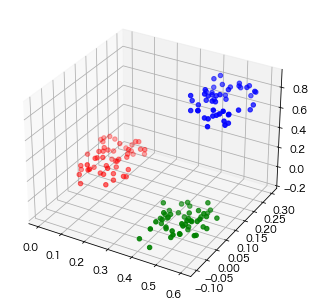

In [13]:
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c=colors)

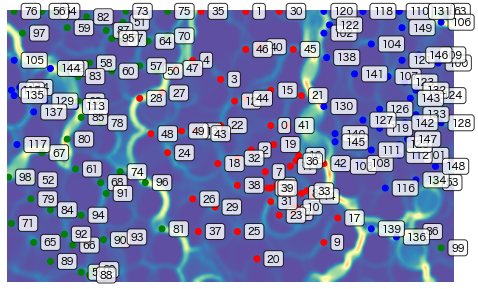

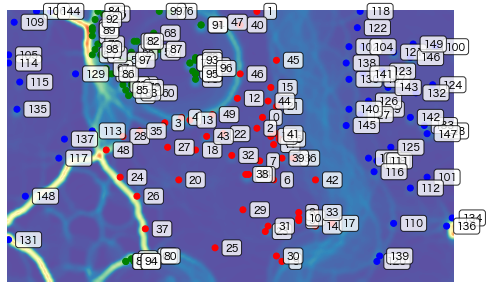

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [14]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=2, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)